# Machine learning for SRE

In [1]:
!pip install numpy scipy scikit-learn graphviz

In [ ]:
# In a shell: sudo apt-get install graphviz

In [5]:
from sklearn import tree
import graphviz

# training data: [Status, CPU, RAM, STORAGE]
data = [
  ['healthy', 45, 32, 65],
  ['unhealthy', 87, 67, 100],
  ['unhealthy', 100, 1, 1],
  ['unhealthy', 76, 70, 90],
  ['unhealthy', 1, 1, 100],
  ['unhealthy', 31, 100, 50],
  ['healthy', 12, 65, 39],
  ['healthy', 20, 10, 46],
  ['unhealthy', 100, 50, 50],
  ['healthy', 34, 70, 37],
  ['healthy', 1, 50, 50],
  ['unhealthy', 50, 50, 100],
  ['healthy', 50, 1, 50],
  ['unhealthy', 1, 100, 1],
  ['healthy', 50, 50, 1],
  ['healthy', 53, 53, 80],
]


In [11]:
metrics = [row[1:] for row in data]
metrics

[[45, 32, 65],
 [87, 67, 100],
 [100, 1, 1],
 [76, 70, 90],
 [1, 1, 100],
 [31, 100, 50],
 [12, 65, 39],
 [20, 10, 46],
 [100, 50, 50],
 [34, 70, 37],
 [1, 50, 50],
 [50, 50, 100],
 [50, 1, 50],
 [1, 100, 1],
 [50, 50, 1],
 [53, 53, 80]]

In [12]:
states = [row[0] for row in data]
states

['healthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'healthy',
 'healthy',
 'unhealthy',
 'healthy',
 'healthy',
 'unhealthy',
 'healthy',
 'unhealthy',
 'healthy',
 'healthy']

In [13]:
mytree = tree.DecisionTreeClassifier()
mytree = mytree.fit(metrics, states)
mytree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
# is 10% cpu, 80% RAM, 10% Storage healthy?
result = (mytree.predict([[10, 80, 10]]))
print("10% CPU, 80% RAM, 10% Storage", result)

10% CPU, 80% RAM, 10% Storage ['healthy']


In [15]:
# is 80% cpu, 10% RAM, 90% Storage healthy?
result = mytree.predict([[80, 10, 90]])
print("80% CPU, 10% RAM, 90% Storage (high)", result)

80% CPU, 10% RAM, 90% Storage (high) ['unhealthy']


In [16]:
# is 60% cpu, 90% RAM, 10% Storage healthy?
result = mytree.predict([[60, 90, 10]])
print("60% CPU, 90% RAM (high), 10% Storage", result)

60% CPU, 90% RAM (high), 10% Storage ['unhealthy']


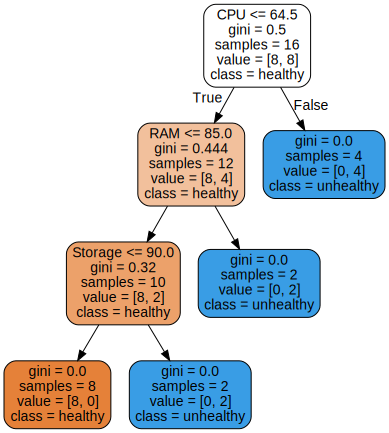

In [20]:
# Visualize the decision tree
dot_data = tree.export_graphviz(mytree,
  feature_names=['CPU','RAM','Storage'],
  class_names=['healthy','unhealthy'],
  filled=True,
  rounded=True,
  out_file=None)

graphviz.Source(dot_data)